In [8]:
import h5py
from pathlib import Path
import sys

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

project_root = Path.cwd().parent
sys.path.append(project_root.as_posix())

from src.data_preprocess import MCSimData

h5_file = (project_root / Path('data/GGF_zz4l.h5')).as_posix()

In [9]:
with h5py.File(h5_file, 'r') as f:
    for group_name in f.keys():
        group = f[group_name]
        print(f"Group: {group_name}")
        for dataset_name in group.keys():
            dataset = group[dataset_name]
            print(f"  Dataset: {dataset_name}, shape = {dataset.shape}, dtype = {dataset.dtype}")

Group: EVENT
  Dataset: deta, shape = (196207,), dtype = float32
  Dataset: mjj, shape = (196207,), dtype = float32
  Dataset: type, shape = (196207,), dtype = int64
Group: J1
  Dataset: eta, shape = (196207, 50), dtype = float32
  Dataset: flavor, shape = (196207,), dtype = int64
  Dataset: mask, shape = (196207, 50), dtype = bool
  Dataset: phi, shape = (196207, 50), dtype = float32
  Dataset: pt, shape = (196207, 50), dtype = float32
Group: J2
  Dataset: eta, shape = (196207, 50), dtype = float32
  Dataset: flavor, shape = (196207,), dtype = int64
  Dataset: mask, shape = (196207, 50), dtype = bool
  Dataset: phi, shape = (196207, 50), dtype = float32
  Dataset: pt, shape = (196207, 50), dtype = float32
Group: LEPTON
  Dataset: eta, shape = (196207, 4), dtype = float32
  Dataset: flavor, shape = (196207, 4), dtype = int64
  Dataset: phi, shape = (196207, 4), dtype = float32
  Dataset: pt, shape = (196207, 4), dtype = float32
Group: TOWER
  Dataset: eta, shape = (196207, 250), dtype 

Loading data from /home/yianchen/NTUHEPML-CWoLa/data/GGF_zz4l.h5 ...
Loading data from /home/yianchen/NTUHEPML-CWoLa/data/GGF_zz4l.h5 ...
 - Channel TOWER has purity 0.0000%
 - Channel TRACK has purity 99.9174%


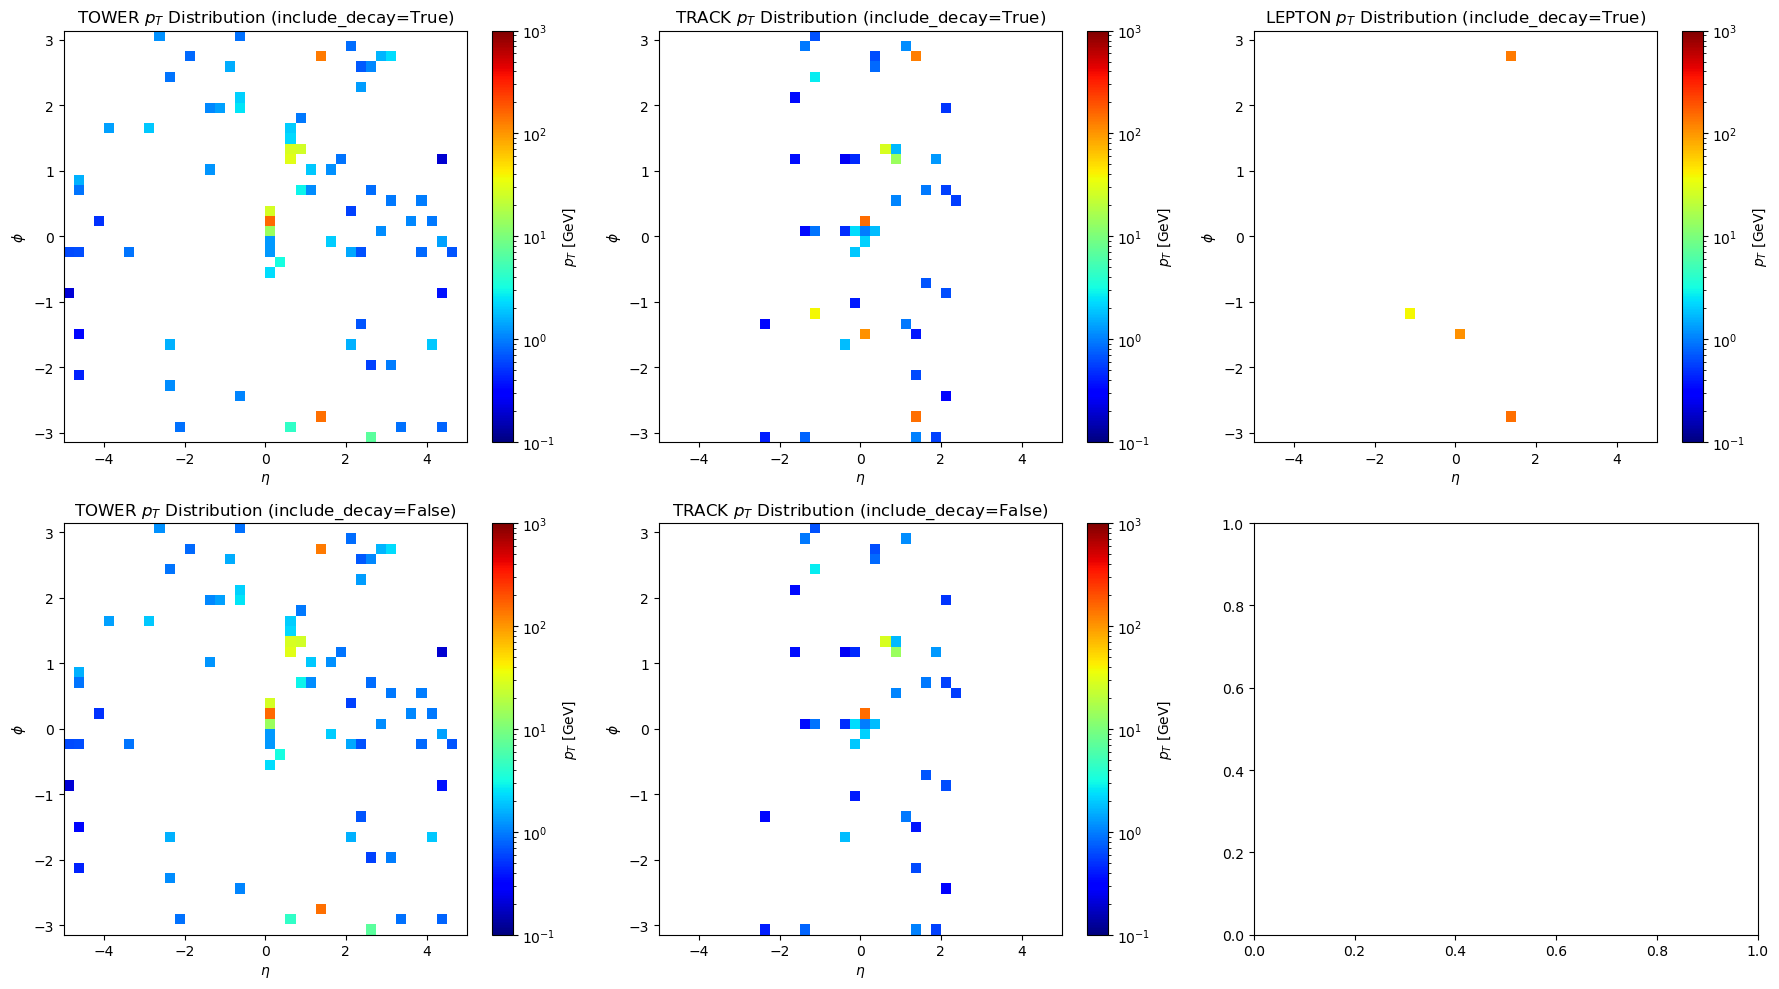

In [10]:
# Plot two rows with including and excluding decay channels
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for i, include_decay in enumerate([True, False]):

    # Create an instance of MCSimData
    sim_data = MCSimData(path=h5_file, include_decay=include_decay)
    channels = sim_data.channels

    # Get the images using the to_image method
    grid_size = 40
    phi_bins = np.linspace(-np.pi, np.pi, grid_size + 1)
    eta_bins = np.linspace(-5, 5, grid_size + 1)
    images = sim_data.to_image(grid_size=grid_size)

    for j, channel in enumerate(channels):
        # Select a specific event index to visualize
        event_idx = 2
        data = images[event_idx, j, :, :].numpy()  # Convert to numpy for plotting
        
        # Mask zeros for proper log scaling
        data_masked = np.ma.masked_where(data == 0, data)
        
        # Plot using pcolormesh. Note: pcolormesh expects bin edges.
        c = axs[i][j].pcolormesh(eta_bins, phi_bins, data_masked,
                norm=LogNorm(vmin=0.1, vmax=1e3), cmap='jet')
        axs[i][j].set_xlabel(r'$\eta$')
        axs[i][j].set_ylabel(r'$\phi$')
        axs[i][j].set_title(f"{channel} $p_T$ Distribution (include_decay={include_decay})")
        fig.colorbar(c, ax=axs[i][j], label=r'$p_T$ [GeV]')

plt.tight_layout()
plt.show()